<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [154]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [155]:
#loading dataset
adu = pd.read_csv("/content/drive/MyDrive/Research/ASD/Autism-Adult-Data.csv",na_values=['?'])

In [156]:
#Adults
adu.sample(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
26,27,0,0,0,0,0,0,0,1,0,...,m,Pasifika,yes,yes,United Arab Emirates,no,1,18 and more,Self,NO
252,253,0,0,0,1,0,0,0,1,0,...,m,Asian,no,no,India,no,2,18 and more,Self,NO
551,552,1,0,0,0,1,0,0,0,0,...,f,White-European,no,yes,Australia,no,3,18 and more,Self,NO
592,593,1,1,1,1,1,1,1,1,1,...,m,White-European,yes,no,United Kingdom,no,10,18 and more,Self,YES
517,518,1,0,1,1,1,0,1,0,1,...,m,Black,no,no,AmericanSamoa,no,7,18 and more,Self,YES


In [157]:
# Number of tuples and fields
print("Adults      :",adu.shape)

Adults      : (704, 22)


In [158]:
#Adults
adu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               704 non-null    int64  
 1   A1_Score         704 non-null    int64  
 2   A2_Score         704 non-null    int64  
 3   A3_Score         704 non-null    int64  
 4   A4_Score         704 non-null    int64  
 5   A5_Score         704 non-null    int64  
 6   A6_Score         704 non-null    int64  
 7   A7_Score         704 non-null    int64  
 8   A8_Score         704 non-null    int64  
 9   A9_Score         704 non-null    int64  
 10  A10_Score        704 non-null    int64  
 11  age              702 non-null    float64
 12  gender           704 non-null    object 
 13  ethnicity        609 non-null    object 
 14  jundice          704 non-null    object 
 15  austim           704 non-null    object 
 16  contry_of_res    704 non-null    object 
 17  used_app_before 

In [159]:
#Adults
adu.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [160]:
#Total number of missing values in each dataset
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Adults's dataset     :  192


In [161]:
#Adults
adu.isnull().sum()

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

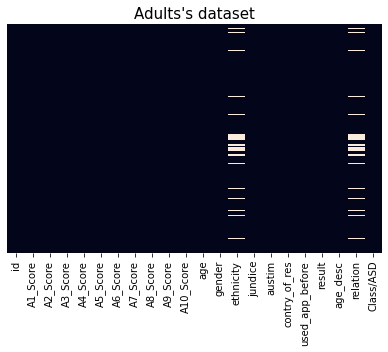

In [162]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap_adu.pdf', transparent=True, dpi=300)

In [163]:
#ASD or Not
print("\nNo of adults diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu['Class/ASD'] == 'NO']))


No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


In [164]:
# #Data distribution
# fig, ax = plt.subplots(figsize=(5, 5))
# sns.countplot(adu['Class/ASD'],ax=ax)
# ax.set_title("Adults's dataset",fontsize = 15)
# fig.tight_layout()
# plt.savefig('distribution_adu.pdf', transparent=True, dpi=300)

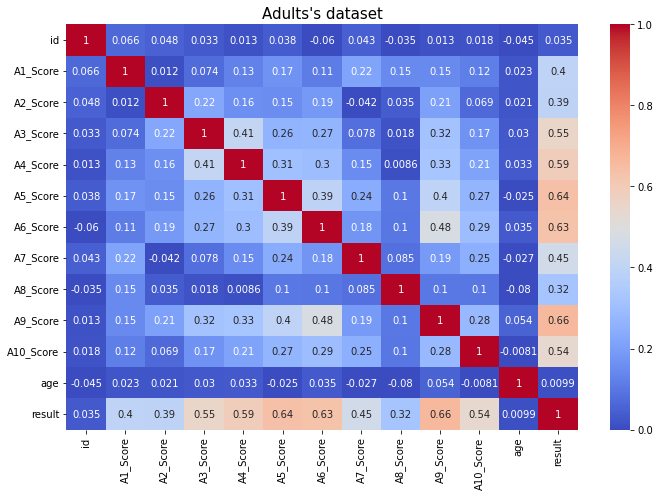

In [165]:
#Correlation
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(adu.corr(),annot=True,cmap='coolwarm',vmin=0, vmax=1,ax=ax)
ax.set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('correlation_adu.pdf', transparent=True, dpi=300)

In [166]:
#Number of missing values in each dataset
print("No of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

No of missing values in Adults's dataset      =  192


In [167]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]

#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.NaN, strategy='mean')
adu.age = imputer_mode.fit_transform(adu.age.values.reshape(-1,1))[:,0]

In [168]:
print("After imputing,\nNo of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Adults's dataset      =  0


In [169]:
#Since age of toddlers are represented in months, age(in years) of adults is converted to age in months.
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

adu['Age_Mons'] = adu['Age_Mons']*12

In [170]:
#Making classes of categorical variables same for all datasets
adu['ethnicity'] = adu['ethnicity'].replace('Others','others')

### **Model fitting**

*Spliting dependent and independent features*


In [171]:
shuffled_data = adu.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=189)
adu= pd.concat([ASD_data, non_ASD_data])

In [172]:
# Split the data into features and target label
raw_target= adu['Class/ASD']
raw_features = adu[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result','relation']]

*Feature Scaling*

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons', 'result']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [174]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,contry_of_res,result,relation
146,1,0,1,1,1,1,1,1,1,1,0.008197,m,White-European,no,no,Australia,0.9,Self
169,1,1,1,1,1,0,0,1,1,1,0.051913,f,Latino,no,yes,Brazil,0.8,Self
641,1,0,1,1,1,0,1,1,1,0,0.032787,m,Latino,no,no,United States,0.7,Self
681,1,1,0,1,1,1,1,1,1,1,0.087432,f,Hispanic,no,no,United States,0.9,Self
696,1,1,1,1,1,1,0,1,1,1,0.038251,m,Turkish,no,yes,Australia,0.9,Self


##Encoding Categorical variables

In [175]:
features = pd.get_dummies(features_minmax_transform)
print('features.shape:', features.shape)

features.shape: (378, 87)


In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)
print('target.shape:', target.shape)

target.shape: (378,)


*Function for Evaluation*

In [177]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss

def model_report(y_act, y_pred):
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")


In [178]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [179]:
X = features
y = target

print('X.shape:', X.shape)
print('y.shape:', y.shape)
# print('X:', X)

X.shape: (378, 87)
y.shape: (378,)


## Feature Selection

In [180]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
chi2_features = SelectKBest(chi2,k=75)
fit= chi2_features.fit(X, y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(50,'Score')) 

                              Features       Score
8                             A9_Score  105.346821
5                             A6_Score   79.310559
4                             A5_Score   53.702479
3                             A4_Score   47.026087
2                             A3_Score   45.301887
11                              result   35.265832
6                             A7_Score   28.520833
9                            A10_Score   27.229249
1                             A2_Score   25.588832
77  contry_of_res_United Arab Emirates   21.125000
79         contry_of_res_United States   18.514286
18           ethnicity_Middle Eastern    16.953488
57                contry_of_res_Jordan   15.695652
51                 contry_of_res_India   14.235294
14                     ethnicity_Asian   10.964912
22            ethnicity_White-European    9.580311
27                          austim_yes    9.290323
0                             A1_Score    8.169935
7                             A

In [181]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2  
# 700 features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2,k=75)
X = chi2_features.fit_transform(X, y)
y = target

In [182]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Clustering

In [183]:
# TSNE Plot
from sklearn.manifold import TSNE

def plotTSNE(data, label):
  # Perform t-SNE with 2 components
  tsne = TSNE(n_components=2)
  data_tsne = tsne.fit_transform(data)

  # Plot the t-SNE results with true labels
  plt.scatter(data_tsne[label==0, 0], data_tsne[label==0, 1], label='Label 0')
  plt.scatter(data_tsne[label==1, 0], data_tsne[label==1, 1], label='Label 1')
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.legend()
  plt.show()


In [184]:
# calculate clustering metrices
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score

def calculate_scores(data, label_true, label_pred, algo):
  # Calculate SC, NMI & ARI
  sc_euclidean = silhouette_score(data, label_pred, metric='euclidean')
  nmi = normalized_mutual_info_score(label_true, label_pred),
  ari = adjusted_rand_score(label_true, label_pred)

  print(algo, ':: NMI:', nmi, ' ARI:', ari, ' SC:', sc_euclidean)


In [187]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, AffinityPropagation, MeanShift, Birch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS, cluster_optics_dbscan

# Perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)


# Perform Agglomerative clustering with 2 clusters
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X_train)
agglo_labels = agglo.fit_predict(X_test)

# # Perform DBSCAN clustering
# dbscan = DBSCAN(eps=1, min_samples=2)
# dbscan.fit(X_train)
# dbscan_labels = dbscan.fit_predict(X_test)

# Perform Gaussian Mixture Model clustering with 2 components
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
gmm_labels = gmm.predict(X_test)

# Perform Spectral Clustering with 2 clusters
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
spectral.fit(X_train)
spectral_labels = spectral.fit_predict(X_test)

# # Perform Affinity Propagation clustering
# affprop = AffinityPropagation()
# affprop.fit(X_train)
# affprop_labels = affprop.predict(X_test)

# # Perform Mean Shift clustering
# ms = MeanShift()
# ms.fit(X_train)
# ms_labels = ms.predict(X_test)

# Perform Birch clustering with 2 clusters
birch = Birch(n_clusters=2)
birch.fit(X_train)
birch_labels = birch.predict(X_test)

# # Perform  clusteriOPTICSng
# optics = OPTICS(min_samples=10, xi=.05, min_cluster_size=.05)
# optics.fit(X_train)
# optics_labels = optics.fit_predict(X_test)

# # Perform HDBSCAN clustering
# hdbscan_labels = hdbscan.HDBSCAN(min_samples=2).fit_predict(X)

# Visualize the clustering results
labels_list = [kmeans_labels, agglo_labels, gmm_labels, spectral_labels, birch_labels]
titles_list = ['K-Means', 'Agglomerative', 'GMM', 'Spectral', 'Birch']

for i in range(len(labels_list)):
    labels = labels_list[i]
    algo = titles_list[i]
    calculate_scores(X_test, y_test, labels, algo)
    model_report(y_test, labels)

    # plt.scatter(X[:,0], X[:,1], c=labels)
    # plt.title(title)
    # plt.xlabel('Feature 1')
    # plt.ylabel('Feature 2')
    # plt.show()

# # Clculate clustering metrices
# calculate_scores(X, label)

# # Plot TSNE with original label
# plotTSNE(X, y)

# # Plot TSNE with predicted label
# plotTSNE(X, label)

K-Means :: NMI: (0.7059367855162894,)  ARI: 0.7978185687682895  SC: 0.15902742105264225
Accuracy =  0.9473684210526315
Precision =  0.9347826086956522
Recall\Sensitivity =  0.9772727272727273
Specificity =  0.90625
F1 Score =  0.9555555555555557
AUC Score = 0.9417613636363636
Kappa score =  0.8911174785100286
Log Loss =  1.897034388900903 

Agglomerative :: NMI: (0.43073181749317274,)  ARI: 0.5367761789181692  SC: 0.15503422548905418
Accuracy =  0.13157894736842105
Precision =  0.15625
Recall\Sensitivity =  0.11363636363636363
Specificity =  0.15625
F1 Score =  0.13157894736842105
AUC Score = 0.1349431818181818
Kappa score =  -0.6945945945945946
Log Loss =  31.301067416864885 

GMM :: NMI: (0.10166820357612269,)  ARI: 0.017581844087156052  SC: 0.011310036550740893
Accuracy =  0.5921052631578947
Precision =  0.8823529411764706
Recall\Sensitivity =  0.3409090909090909
Specificity =  0.9375
F1 Score =  0.4918032786885246
AUC Score = 0.6392045454545454
Kappa score =  0.24968152866242033
Lo